#### Lets create some visualization to analyze the dataset


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
insurance.info()
insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [112]:
#change the children col to categorical
insurance['children'] = insurance['children'].astype('category')

[]

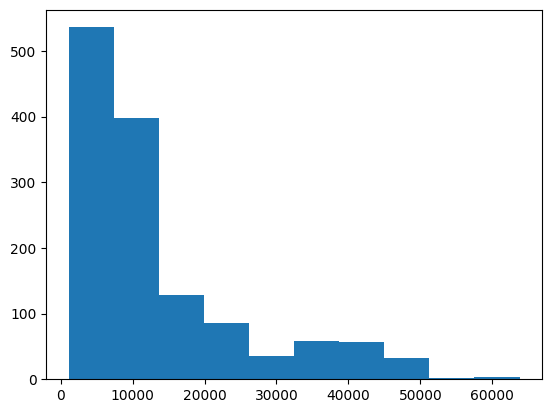

In [113]:
fig, ax = plt.subplots()

#checks if age is normally distributed
ax.hist(insurance['charges'])
plt.plot()

Text(0, 0.5, 'count')

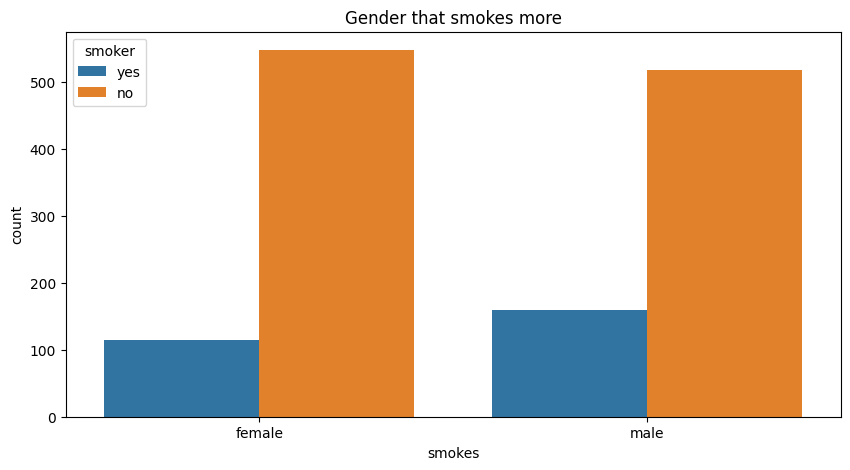

In [114]:
#groupby sex and ckeck who smoke more
# smoke_more = insurance.groupby('sex')['smoker']
fig, ax = plt.subplots(1,1, figsize= (10,5))
ax = sns.countplot(x = 'sex', hue= 'smoker',  data = insurance, )
ax.set_title('Gender that smokes more')
ax.set_xlabel('smokes')
ax.set_ylabel('count')

C:\Users\Amina\AppData\Local\Temp\ipykernel_9468\3805475517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges, y = charges.index, palette='Blues');


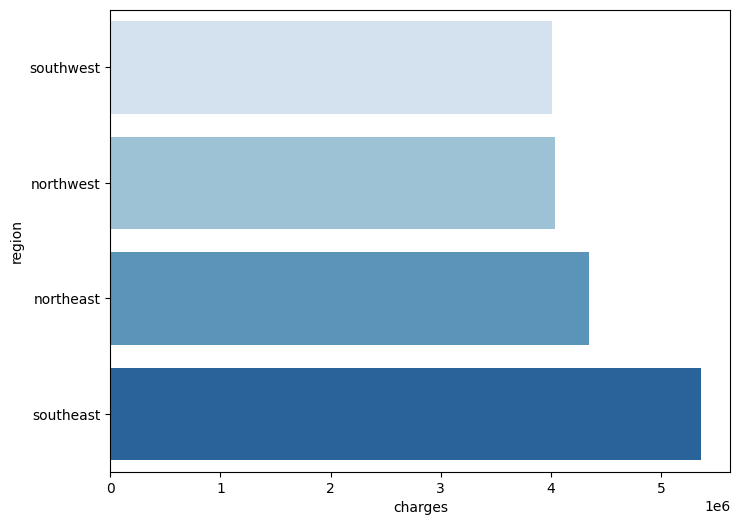

In [115]:
# check the region that has the higest charges
fig, ax = plt.subplots(1, 1, figsize = (8,6))
charges = insurance['charges'].groupby(insurance.region).sum().sort_values(ascending = True)
ax = sns.barplot(x = charges, y = charges.index, palette='Blues');


southeast has the highest charges followed by northeast, now lets check why
- is it the number of children 
- or due to smoking

C:\Users\Amina\AppData\Local\Temp\ipykernel_9468\3731198622.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(insurance['children'], ax = ax[0], palette='Blues')


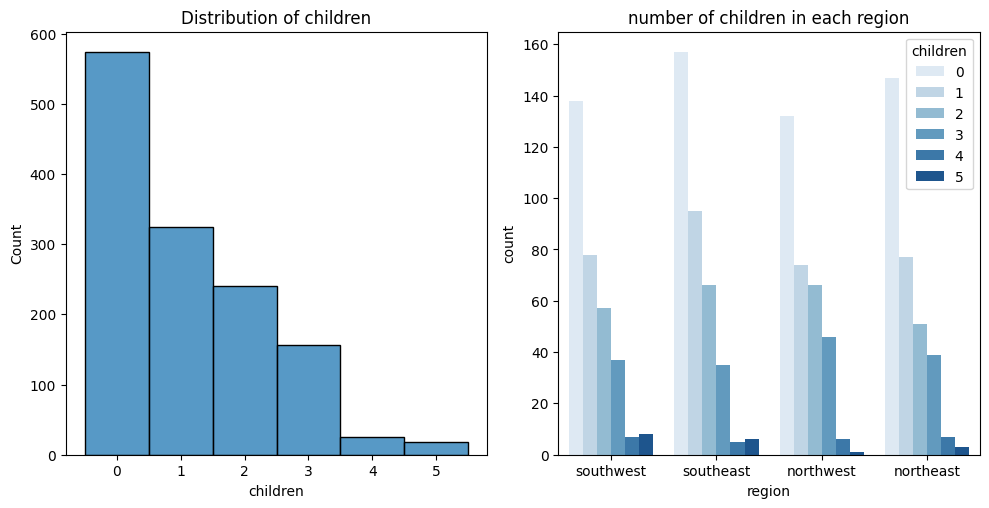

In [116]:
# which region has the higest no of children/ lets check the distribution of children

fig, ax =plt.subplots(ncols = 2, figsize=(10,5))
sns.histplot(insurance['children'], ax = ax[0], palette='Blues')
sns.countplot(x= 'region', hue = 'children', data= insurance, palette='Blues', ax= ax[1])
plt.tight_layout()
ax[0].set_title('Distribution of children')
ax[1].set_title('number of children in each region');

In [117]:
#sum the number of children in each region and plot only the count 
children = insurance.groupby('region').apply(lambda x: x['children'].astype(int).sum()).sort_values()
fig, 

C:\Users\Amina\AppData\Local\Temp\ipykernel_9468\3264719747.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  children = insurance.groupby('region').apply(lambda x: x['children'].astype(int).sum()).sort_values()


(<Figure size 1000x500 with 2 Axes>,)

Text(0, 0.5, 'region')

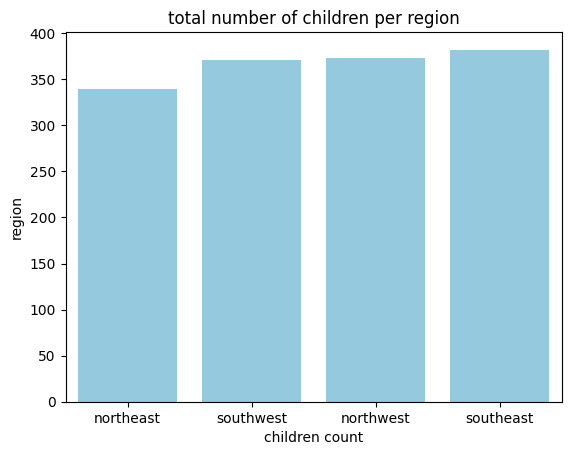

In [118]:
#lets compare the number of children per region
fig, ax = plt.subplots()
ax = sns.barplot(children, color = 'skyblue')
ax.set_title('total number of children per region')
ax.set_xlabel('children count')
ax.set_ylabel('region')

Text(0.5, 1.0, 'Does male have higher charges than female')

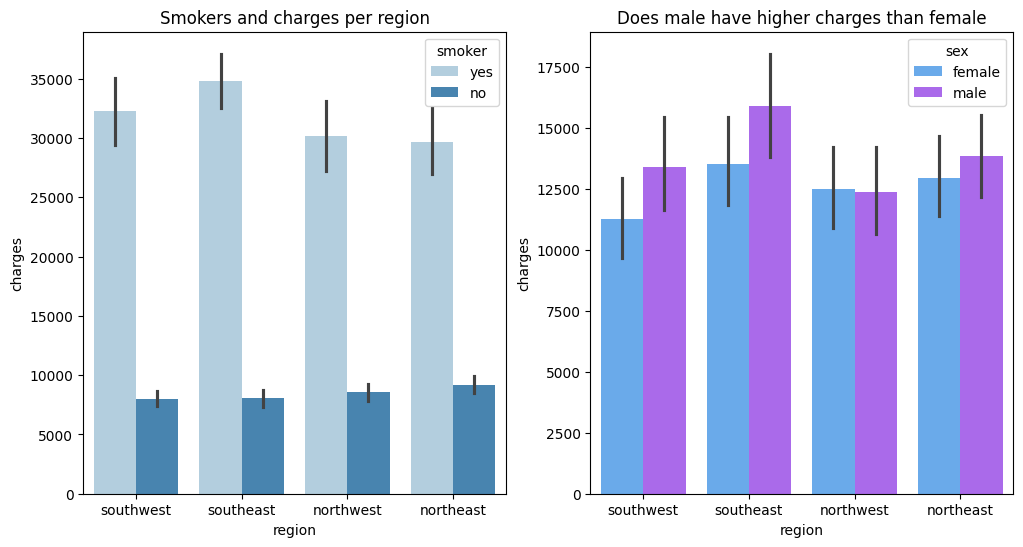

In [119]:
 # plot  scatter of region and charges with hue= smokers
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.barplot(x='region', y= 'charges', hue = 'smoker', data=insurance, ax=ax[0], palette='Blues');
sns.barplot(x='region', y='charges', hue = 'sex', data= insurance, ax=ax[1], palette = 'cool');
ax[0].set_title('Smokers and charges per region')
ax[1].set_title('Does male have higher charges than female')

- people in the southeast has a higher smokers and thus a higher charges, 
- people in the northwest as lower smoker rate 
- charges foe male are higher generally and male smokers are more than female
- 

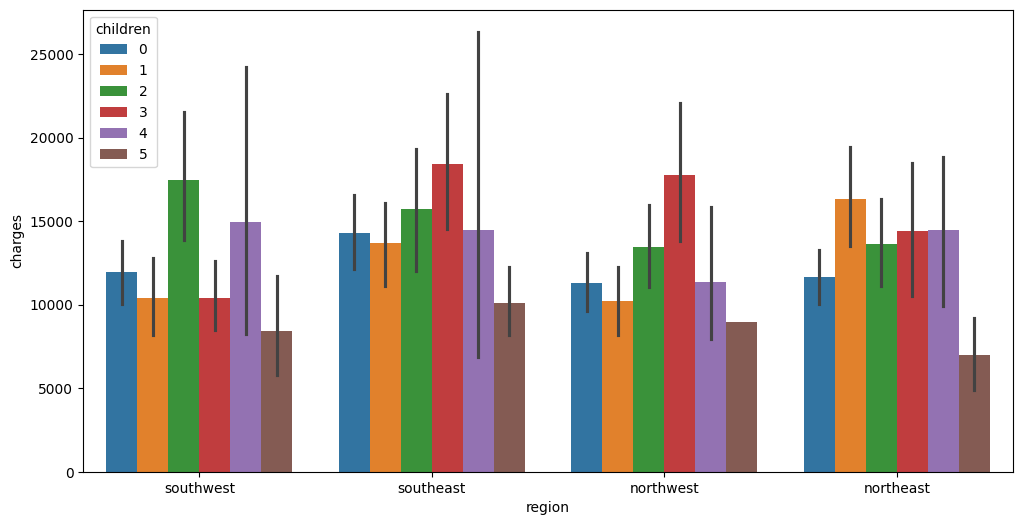

In [120]:
fig, ax = plt.subplots(figsize= (12,6))
ax = sns.barplot(x='region', y='charges', hue='children', data= insurance)

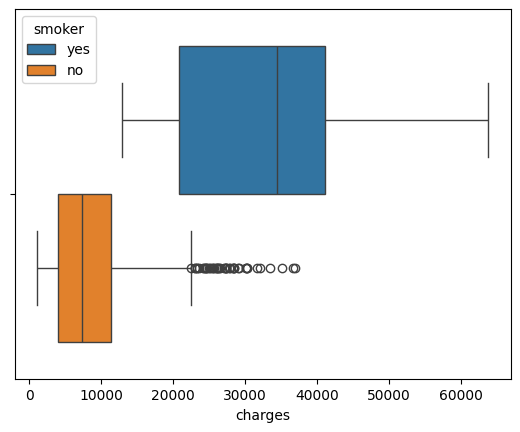

In [121]:
#boxplot of charges and smokers
sns.boxplot(x='charges', hue='smoker', data=insurance)
plt.show()

The boxplot of charges with smoker as hue shows that smokers have significantly higher medical charges compared to non-smokers. The median, upper quartile, and maximum charges for smokers are much greater than those for non-smokers, indicating that smoking is strongly associated with increased insurance charges. Additionally, the spread (interquartile range) of charges is wider for smokers, suggesting more variability in their medical costs.

To conclude this, the number of children, sex and smokers are the factors that affects charges and a smoker has a higher charge

<Axes: xlabel='bmi', ylabel='charges'>

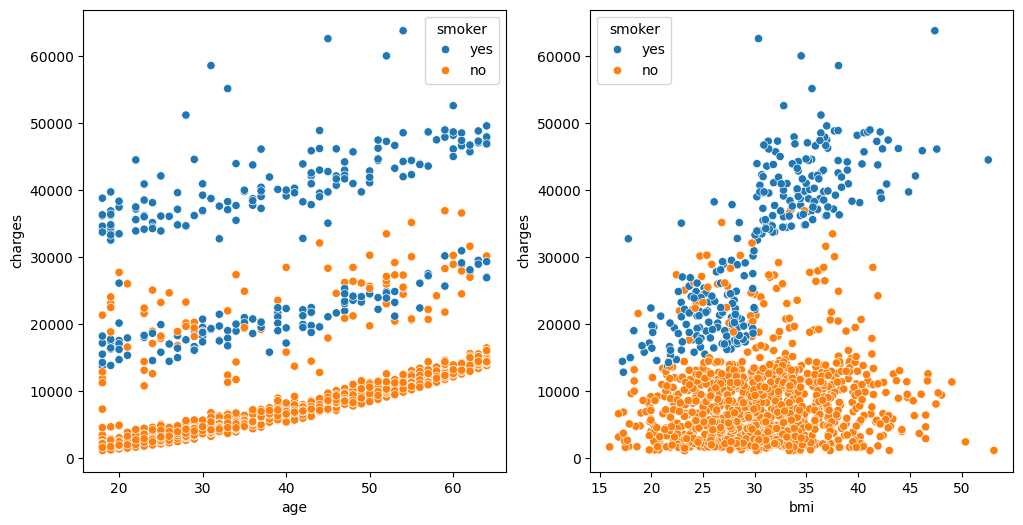

In [122]:
#checking linearity of the dataset
fig, ax = plt.subplots(ncols = 2, figsize = (12,6))
sns.scatterplot(x = 'age', y= 'charges',  hue = 'smoker', data= insurance, ax = ax[0])
sns.scatterplot(x = 'bmi', y= 'charges', hue = 'smoker', data= insurance, ax = ax[1])

In [123]:
#convert sex, region nd smoker to dtype category
insurance['sex'] = insurance['sex'].astype('category')
insurance['region'] = insurance['region'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')

# model training

### Linear Regression

In [124]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
# selecting features and transforming categorical features to numerical
categorical_features = ['sex', 'smoker', 'region']

#use col transformer to convert cat col 
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)],
                                 remainder='passthrough')
#assign features
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_trai, X_tes, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#transform the split data 
X_train = preprocessor.fit_transform(X_trai)
X_test = preprocessor.fit_transform(X_tes)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#make prediction
lin_pred = linreg.predict(X_test)

#calculate the MEA and MSE
lin_MAE = mean_absolute_error(y_test, lin_pred)
lin_MSE = mean_squared_error(y_test, lin_pred)
lin_RMSE = np.sqrt(lin_MSE)
lin_r2_score = r2_score(y_test, lin_pred)

print(f'Linear Regression MAE: {lin_MAE}')
print(f'Linear Regression MSE: {lin_MSE}')
print(f'Linear Regression RMSE: {lin_RMSE}')
print(f'r2_score: {lin_r2_score}')

#calculate the percentage of rmse
average_charges = np.mean(insurance['charges'])
print(average_charges)
rmse_percentage = (lin_RMSE / average_charges)*100
print(f'RMSE percentage: {rmse_percentage}%')
# visualize the training
# plt.scatter(y_test, lin_pred)
# plt.xlabel('Actual Charges')
# plt.ylabel('Predicted Charges')
# plt.title('Actual vs Predicted Charges')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.show()

Linear Regression MAE: 4181.194473753653
Linear Regression MSE: 33596915.85136148
Linear Regression RMSE: 5796.284659276275
r2_score: 0.7835929767120722
13270.422265141257
RMSE percentage: 43.67822322053726%


what is linear reg intercept, coeff and score


In [125]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_MAE = mean_absolute_error(y_test, lasso_pred)
lasso_MSE = mean_squared_error(y_test, lasso_pred)
lasso_RMSE = np.sqrt(lasso_MSE)
lasso_RMSE_percentage = (lasso_RMSE / average_charges)*100
lasso_r2_score = r2_score(y_test, lasso_pred)
print(f'Lasso Regression MAE: {lasso_MAE}')
print(f'Lasso Regression MSE: {lasso_MSE}')
print(f'Lasso Regression RMSE: {lasso_RMSE}')
print(f'Lasso RMSE percentage: {lasso_RMSE_percentage}%')
print(f'Lasso r2_score: {lasso_r2_score}')



Lasso Regression MAE: 4181.743486081486
Lasso Regression MSE: 33601404.83773449
Lasso Regression RMSE: 5796.671875976291
Lasso RMSE percentage: 43.681141113369%
Lasso r2_score: 0.783564061909807


In [126]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_MAE = mean_absolute_error(y_test, ridge_pred)
ridge_MSE = mean_squared_error(y_test, ridge_pred)
ridge_RMSE = np.sqrt(ridge_MSE)
ridge_RMSE_percentage = (ridge_RMSE / average_charges)*100
ridge_r2_score = r2_score(y_test, ridge_pred)
print(f'Ridge Regression MAE: {ridge_MAE}')
print(f'Ridge Regression MSE: {ridge_MSE}')
print(f'Ridge Regression RMSE: {ridge_RMSE}')
print(f'Ridge RMSE percentage: {ridge_RMSE_percentage}%')
print(f'Ridge r2_score: {ridge_r2_score}')

Ridge Regression MAE: 4187.302782980901
Ridge Regression MSE: 33619947.00761634
Ridge Regression RMSE: 5798.271036060348
Ridge RMSE percentage: 43.69319167251554%
Ridge r2_score: 0.7834446266673822


In [127]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Random Forest 

In [128]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_MAE = mean_absolute_error(y_test, rf_pred)
rf_MSE = mean_squared_error(y_test, rf_pred)
rf_RMSE = np.sqrt(rf_MSE)
rf_RMSE_percent = (rf_RMSE/average_charges)*100
rf_r2_score = r2_score(y_test, rf_pred)
print(f'Random forest MAE: {rf_MAE}')
print(f'Random forest MSE: {rf_MSE}')
print(f'Random forest RMSE: {rf_RMSE}')
print(f'Random forest RMSE_percentage: {rf_RMSE_percent}')
print(f'Random forest r2 score: {rf_r2_score}')



Random forest MAE: 2545.27659835908
Random forest MSE: 21072440.160886012
Random forest RMSE: 4590.47276006361
Random forest RMSE_percentage: 34.59176104834179
Random forest r2 score: 0.8642665871830159


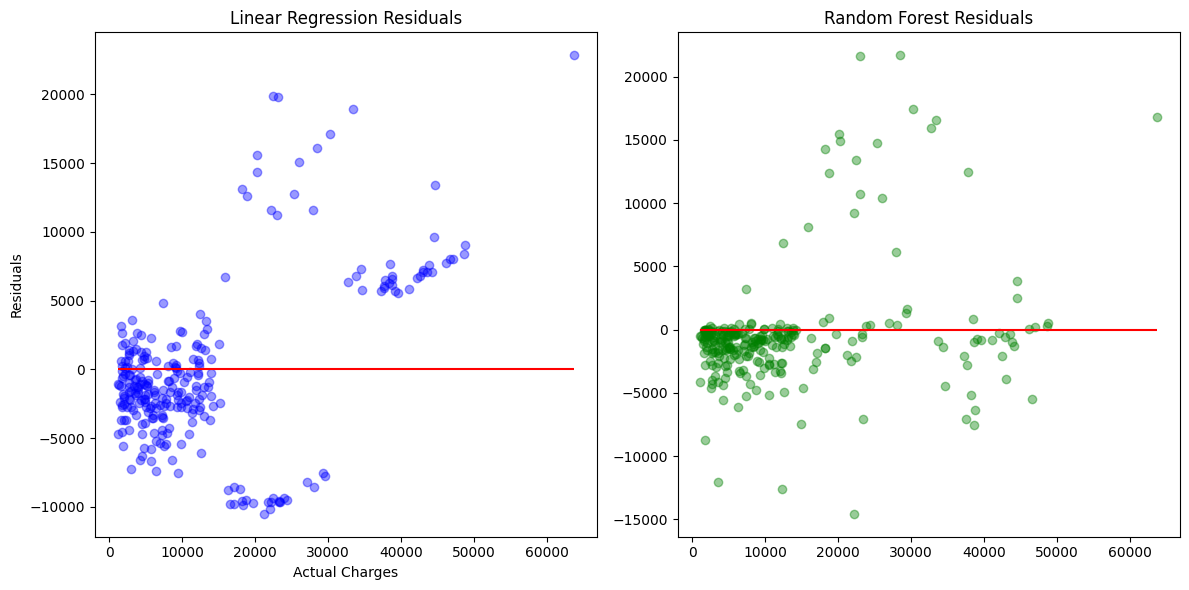

In [129]:
#plot the residual errors actual value - predicted value
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].scatter(y_test, y_test - lin_pred, color='blue', alpha=0.4)
ax[0].hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
ax[0].set_title('Linear Regression Residuals')
ax[0].set_xlabel('Actual Charges')
ax[0].set_ylabel('Residuals')
ax[1].scatter(y_test, y_test - rf_pred, color='green', alpha=0.4)
ax[1].hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
ax[1].set_title('Random Forest Residuals')
plt.tight_layout()

## Model improvements
- feature engineering: adding more features to the dataset
    - add age*2
    - smoker and bmi 
- polynomialFeature
- using crossvalidation on spliting training data
- using randomizedsearchcv (Random forest)
- use pipeline for smototh process

In [130]:
from sklearn.preprocessing import PolynomialFeatures 
#adding polynomial feature

pol = PolynomialFeatures(degree=2)
X_train_pol = pol.fit_transform(X_train)
X_test_pol = pol.fit_transform(X_test)

linreg_pol = LinearRegression()
linreg_pol.fit(X_train_pol, y_train)
linreg_pol_pred = linreg_pol.predict(X_test_pol)

linreg_pol_MAE = mean_absolute_error(y_test, linreg_pol_pred)
linreg_pol_MSE = mean_squared_error(y_test, linreg_pol_pred)
linreg_pol_RMSE = np.sqrt(linreg_pol_MSE)
linreg_pol_RMSE_percentage = (linreg_pol_RMSE/average_charges)*100
linreg_pol_r2_score = r2_score(y_test, linreg_pol_pred)
print(f'Polynomial Linear Regression MAE: {linreg_pol_MAE}')
print(f'Polynomial Linear Regression MSE: {linreg_pol_MSE}')
print(f'Polynomial Linear Regression RMSE: {linreg_pol_RMSE}')
print(f'Polynomial Linear Regression RMSE percentage: {linreg_pol_RMSE_percentage}%')
print(f'Polynomial Linear Regression r2 score: {linreg_pol_r2_score}')


Polynomial Linear Regression MAE: 2729.5001336394475
Polynomial Linear Regression MSE: 20712805.98791847
Polynomial Linear Regression RMSE: 4551.132385233203
Polynomial Linear Regression RMSE percentage: 34.29530948075494%
Polynomial Linear Regression r2 score: 0.8665830903164834


### Note that with using polynomialfeatures has improved the linearRegression model

<Axes: >

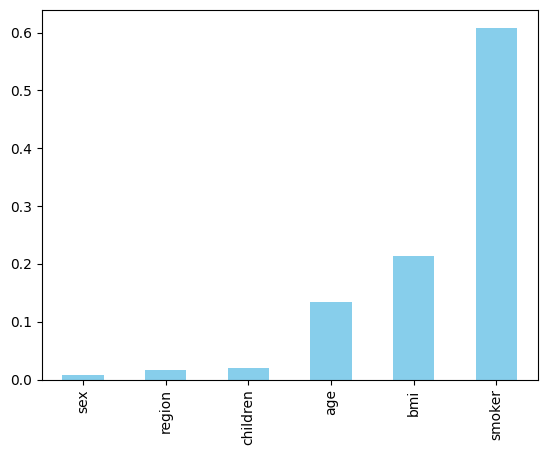

In [140]:
# lets check feature importance and print them

importance = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# group the features name into its orinignal names using a loop
feature_importance = {}
for name, imp in zip(feature_names, importance):
    original_name = name.split('__')[1].split('_')[0]
    feature_importance[original_name] = feature_importance.get(original_name, 0) + imp

#sort and print the feature importance
importance_sorted = pd.Series(feature_importance).sort_values(ascending = True)
importance_sorted

#lets plot the feature importance
importance_sorted.plot(kind = 'bar', color = 'skyblue')